This notebook if demonstation for challenge Vietnamese NLP Dataset for Continual Learning. In the past, underthesea team is only focused on tuning model. In this project, we create a simple challenge for ourselves to build a continuous learning NLP system.

## The August 2021 Challenges Vietnamese NLP Dataset for Continual Learning

The August 2021 Challenges are [part-of-speech tagging](https://en.wikipedia.org/wiki/Part-of-speech_tagging) and [dependency parsing](https://universaldependencies.org/).

### Create environement

In [1]:
%load_ext autoreload
%autoreload 2

# add project folder
import os
from os.path import dirname, join
PROJECT_FOLDER = dirname(dirname(os.getcwd()))
os.sys.path.append(PROJECT_FOLDER)

# add dependencies
from underthesea.utils.col_analyzer import UDAnalyzer
from underthesea.utils.col_script import RawToUDDataset
from IPython.display import display, display_png
from wordcloud import WordCloud
from PIL import Image
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

# init folder
DATASETS_FOLDER = join(PROJECT_FOLDER, "datasets")
COL_FOLDER = join(DATASETS_FOLDER, "UD_Vietnamese-COL")
raw_file = join(COL_FOLDER, "corpus", "raw", "202108.txt")

Load dictionary with 31327 words.


### Load dataset

In [2]:
%%capture
raw_file = join(COL_FOLDER, "corpus", "raw", "202108.txt")
dataset = RawToUDDataset(raw_file)

ud_file = join(COL_FOLDER, "corpus", "ud", "202108.txt")
dataset.write(ud_file)

In [3]:
analyzer = UDAnalyzer()

In [4]:
analyzer.analyze_dataset_len(dataset)

Number of sentences 50


In [5]:
analyzer.analyze_sent_ids(dataset)

### Explore words

We want to explore:

* What is word freqquences?
* How many words in this corpus?
* What are out of vocabulary words?

In [6]:
counter = analyzer.analyze_words(dataset)

Words
[(',', 86), ('.', 41), ('của', 13), ('và', 13), ('trong', 13), ('là', 12), ('đã', 12), ('được', 11), ('ngày', 11), ('người', 10), ('để', 10), ('ở', 9), ('với', 9), ('hà nội', 9), ('từ', 9), ('bán', 9), ('mua', 9), ('đặt', 8), ('tháng', 8), ('mới', 8), ('này', 8), ('ra', 8), ('cho', 8), ('không', 8), ('2', 7), ('vào', 7), ('có', 7), ('các', 7), ('về', 7), ('nhà', 7), ('cá', 7), ('nướng', 7), ('nhiều', 6), ('chợ', 6), ('chị', 6), ('rất', 5), ('đó', 5), ('những', 5), ('nhanh', 5), ('covid-19', 5), ('nghiện', 5), ('(', 5), (')', 5), ('con', 5), ('vàng', 5), ('vàng mã', 5), ('đây', 4), ('năm', 4), ('hai', 4), ('nhưng', 4)]
Out of dictionary
Corpus words:  573
OOV words
{'amrullah saleh', '14-8', 'quang liêm', '14/8', '/', 'ba đình', '15', 'vĩnh thạnh', 'saleh', 'st louis', '13-8', 'sốt ho', '%', '35', 'rt-pcr', 'mai x.b.', 'the guardian', 'sergio ramos', 'trứng gà', 'châu á', 'ramos', 'bố chồng', 'nhà chồng', '1.700', '2.709', '7/8', '3', 'đầu mùa', '1.677', 'đồ mã', 'kabul', 'ngọc lâ

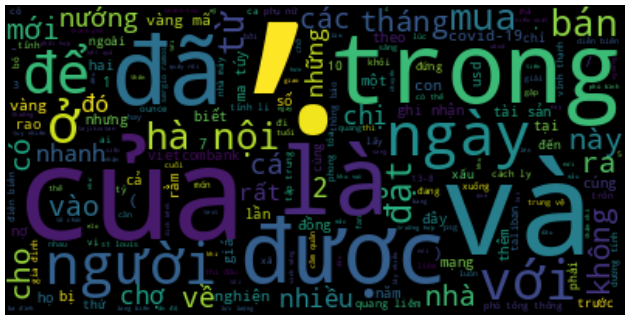

In [7]:
w1 = WordCloud().generate_from_frequencies(counter)
plt.figure(figsize=(16, 12), dpi=50)
plt.imshow(w1, interpolation="bilinear")
plt.axis("off")
plt.show()

Beautiful word cloud for most frequencies words in this corpus.

## How to Contribute?

It's great that you find this project interesting. Even the smallest contribute is appreciated. Welcome to this exciting journey with us.

### You can contribute in so many ways!

* [Create more usefull open data](https://github.com/undertheseanlp/underthesea/tree/master/datasets/UD_Vietnamese-COL)
* [Create more cool explore](https://github.com/undertheseanlp/underthesea/tree/master/datasets/UD_Vietnamese-COL)